Import Necessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementations

In [19]:
def stock_price(s_0 = 100, dt = 0.004, r = 0.05, q = 0.02, vol = 0.4, period = 250):
        
    prices = np.zeros(period) ## initialize an empty array to store prices that move based on Brownian motion
    epsilon = np.random.randn(period) ## an array of standard normal errors
    price_new = s_0
    
    for a in range(period):
        price_new = price_new + (r - q) * dt + vol * np.sqrt(dt) * epsilon[a] ## updated price of the stock
        prices[a] = price_new    
        
    return prices ## vector of history of prices

def simulation(iterations = 10000, period = 250):
    simulations = np.zeros((iterations,period))
    for i in range(iterations):
        simulations[i] = stock_price()
    return simulations
        
def option_price(option_payoff, rate = 0.05, T = 0.75): 
    
    return int(np.sum(option_payoff)/10000*np.exp(-T*rate)*10000)/10000
    
def plotting(payoffs,name):
    plt.hist(payoffs, bins = 30)
    plt.xlabel("Payoffs")
    plt.title("Payoff Histogram of " + name + " With Average Payoff")
    avg = np.mean(payoffs)
    plt.scatter(avg,0, color = "blue", s = 40, marker = 'o') ## Note average payoff at maturity
    plt.show()

## European Call Option

Compute the price of a European call option with a strike price of 110 that pays at maturity:

$$ P = max(S_T - 110, 0) $$


## European Put Option

Compute the price of a European put option with a strike price of 90 that pays at maturity:

$$ P = max(90 - S_T, 0) $$

## Floating Lookback Call Option

Compute the price of the floating lookback call option that pays at maturity:

$$ P = S_T - S_{min} $$

$S_{min}$: Minimum price of the stock in each path



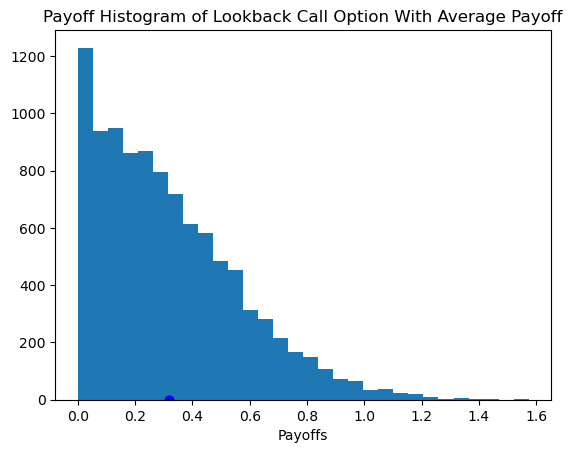

Price of Lookback Call Option: $0.308


In [20]:
def lookBackCallPrice(sim = simulation()):
    
    payoffs = np.zeros(len(sim)) ## initialize empty array for payoffs
    i = 0
    for vector in sim:
        K = np.min(vector) ## "strike" of this option is the minimum
        S_T = vector[-1] ## price at maturity
        payoffs[i] = (S_T - K) ## append the payoffs of each simulation
        i += 1
    plotting(payoffs, "Lookback Call Option")    
    print("Price of Lookback Call Option: $" + str(option_price(payoffs))) ## calculate the price from the payoffs of all sims
lookBackCallPrice()

## Floating Lookback Put Option

Compute the price of the floating lookback put option that pays at maturity:

$$ P = S_{max} - S_T $$

$S_{max}$: Maximum price of the stock in each path

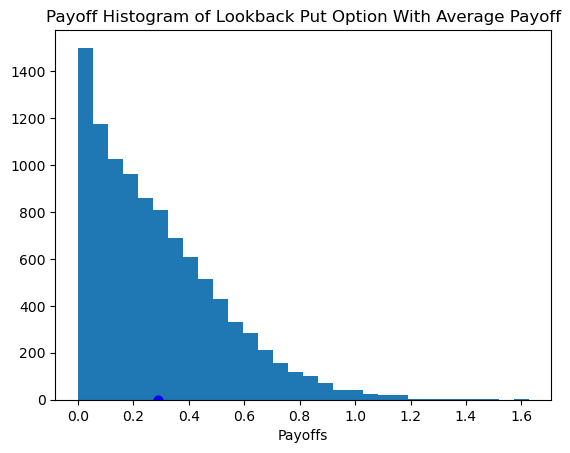

Price of Lookback Put Option: $0.2771


In [21]:
def lookBackPutPrice(sim = simulation()):
    
    payoffs = np.zeros(len(sim)) ## initialize empty array for payoffs
    i = 0
    for vector in sim:
        K = np.max(vector) ## "strike" of this option is the maximum
        S_T = vector[-1] ## price at maturity
        payoffs[i] = (K - S_T) ## append the payoffs of each simulation
        i += 1
    plotting(payoffs, "Lookback Put Option")   
    print("Price of Lookback Put Option: $" + str(option_price(payoffs))) ## calculate the price from the payoffs of all sims
    
lookBackPutPrice()

## Average Strike Asian Call Option

Compute the price of an average strike call option that pays at maturity:

$$ P = max(S_T - \bar{S}) $$

$\bar{S}$: Average price of the stock in each path

## Average Strike Asian Put Option

Compute the price of an average strike call option that pays at maturity:

$$ P = max(\bar{S} - S_T) $$

$\bar{S}$: Average price of the stock in each path